# Chapter 1: Exploratory Data Analysis

**Dataset:** https://www.kaggle.com/justinas/nba-players-data

**Summary:** Below I demonstrate some data analytics techniques that are useful in examining:

- The first statistical moment: estimate of location
- The second statistical moment: estimate of variability
- The third statistical moment: estimate of skewedness
- The fourth statistical moment estimate of kurtosis

I have used "Chapter 1 - Exploratoy Data Analysis" from Practical Statistics for Data Scientists (O'Reilly) as a reference point and have written my own code as the code in the book wasn't reliable.  

**Limitations:** I am not attempting to answer any specific questions in this piece. The purpose is to demonstrate the tools themselves and leave you resourced to frame and answer your own questions using the techniques below.

Questions to answer:
 - 

In [2]:
# import modules
import matplotlib.pyplot as plt
import numpy as np # numerical python for working with arrays/matricies
import pandas as pd # data analytics library for working with panel (structured) data
import seaborn as sns # a sick plotting library (in lieu of plotly, which doesn't integrate with free GitHub)
from scipy.stats import binom
from scipy.stats import trim_mean # method to calculate trimmed mean
from statistics import variance
from statistics import stdev # method to calculate standarv deviation of an array

### Importing our data and getting set up

In [5]:
# import our dataset into variable raw_data
raw_data = pd.read_csv('all_seasons.csv')
# create copy of raw_data for workings
df = raw_data.copy()
# turn max columns off so we can view full width of dataframe
pd.set_option('max_columns', None)

### Getting a feel for the dataset

In [10]:
# calclate dimensions of our dataframe (rows x columns)
print(df.shape)
# rewrite the above code to be more detailed in output by accessing rows and columns index 
print(f'The dataframe contains {df.shape[0]} rows and {df.shape[1]} columns.')

(11700, 22)
The dataframe contains 11700 rows and 22 columns.


In [8]:
# take a look at column names, any missing values as column data types (object = string/textual)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11700 entries, 0 to 11699
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11700 non-null  int64  
 1   player_name        11700 non-null  object 
 2   team_abbreviation  11700 non-null  object 
 3   age                11700 non-null  float64
 4   player_height      11700 non-null  float64
 5   player_weight      11700 non-null  float64
 6   college            11700 non-null  object 
 7   country            11700 non-null  object 
 8   draft_year         11700 non-null  object 
 9   draft_round        11700 non-null  object 
 10  draft_number       11700 non-null  object 
 11  gp                 11700 non-null  int64  
 12  pts                11700 non-null  float64
 13  reb                11700 non-null  float64
 14  ast                11700 non-null  float64
 15  net_rating         11700 non-null  float64
 16  oreb_pct           117

### The First Statistical Moment: Estimates of Location

**Mean:** Sum of values divided by count of values.

In [12]:
# With methods
df['player_height'].mean()

200.7285008547074

In [11]:
# With my own function
def my_mean(array):
    n_players = len(array)
    total = 0
    sentinel = 0
    while sentinel < n_players:
        height = array[sentinel]
        total += height 
        sentinel += 1
    mean = total / n_players
    return mean

my_mean(df['player_height'])

200.7285008547074

**Trimmed Mean:** Involves removing a user-specified fixed set of numbers from the tails of a distribution and taking the mean from the remaining array.

This techniques helps reduce the impact of outliers and is widely preferred to the standard mean.

In [13]:
# With methods
trim_mean(df['player_height'], 0.1)

201.095405982906

In [25]:
# without methods/writing our own function

**Weighted Mean:** Same as mean but with every value multiplied with a user specified  before summing and dividng by the number of values.

This techniques is useful when some values are intrinsically more valuable than others or the data collected does not equally represent the different groups we are measuring.

In [14]:
# With methods
np.average(df['player_height'], weights = df['player_weight'])

201.67372543223348

**Median:** The middle value in a numerically sorted array.

In [15]:
# With methods
df['player_height'].median()

200.66

**Weighted Median:** Weighted Median: We multiply every value with some weight xi and then pick the middle value such that the sum of values to the left of the median are the same as the sum of values to the rights of the median.

In [34]:
# Writing my own function
def my_weighted_median(df, median_col, weight_col):
    df = df.sort_values(median_col)
    cumsum = df[weight_col].cumsum()
    cutoff = df[weight_col].sum() / 2
    return df[cumsum >= cutoff][median_col].iloc[0]

my_weighted_median(df, 'player_height', 'player_weight')

203.2

**Percentile:** The value such that P percent of the data lay below it.

In [41]:
np.percentile(df['player_height'], 75)

208.28

### The Second Statistical Moment: Estimates of Variability

Measuring variability is the second dimension to summarising a feautre (column, series, 1-D array). Variability is central to statistics and we can generate a lot of useful information about our dataset here.

#### Non-Robust Measures of deviation

**Variance:** Average of the squared deviations, where we have summed squared deviations from the mean and dividied by n-1 where n is the number of values. AKA mean squared error.

In [46]:
# With methods
variance(df['player_height'])

84.08572969527239

In [16]:
# Writing my own function
def my_variance(col):
    mean_height = my_mean(col)
    total_squared_errors = 0
    for value in col:
        difference = value - mean_height
        total_squared_errors += difference ** 2
    variance = total_squared_errors/len(col)
    return variance

my_variance(df['player_height'])    

84.07854288076574

**Standard Deviation**: The square root of the variance, bringing result to the same scale as the original data.

The superior choice to mean absolute deviation because working with squared values is easier that absolute value

In [17]:
# With methods
stdev(df['player_height'])

9.169827135517462

In [53]:
# Writing my own funciton
def my_stdev(col):
    mean_height = my_mean(col)
    total_squared_errors = 0
    for value in col:
        difference = value - mean_height
        total_squared_errors += difference ** 2
    variance = total_squared_errors/len(col)
    stdev = variance ** (1/2)
    return stdev

my_stdev(df['player_height']) 

9.16943525418909

**Mean Absolute Deviation:** The mean of the absolute deviations from the mean.

In [54]:
np.mean(np.absolute(df['player_height'] - np.mean(df['player_height'])))

7.48758317393521

#### Robust Measures of Deviation 

**Median Absolute Deviation:** The median of the absolute deviations from the median

In [55]:
np.median(np.absolute(df['player_height'] - np.median(df['player_height'])))

7.6200000000000045

**Range:** The difference between the smalles and largest data points, in a way summarising spread.

In [7]:
np.max(df['player_height']) - np.min(df['player_height'])

71.11999999999998

**Minimum:** Smallest value in an array.

In [10]:
np.min(df['player_height'])

160.02

**Maximum:** Largest value in an array.

In [9]:
np.max(df['player_height'])

231.14

**Interquartile Range:** Difference between 75th and 25th percentile.

In [12]:
np.percentile(df['player_height'], [75, 25])

array([208.28, 193.04])

### The Third and Fourth Statistical Moments: Exploring the Data Distribution for Skewedness and Kurtosis

**Boxplots:** Useful way to summarise the distribution of your data in your dataset.

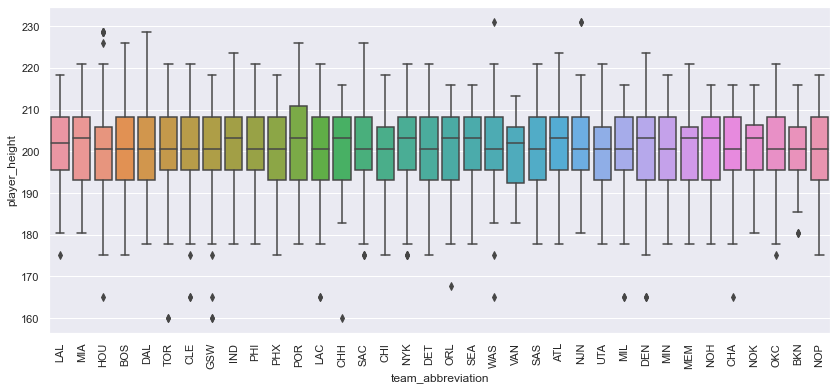

In [27]:
# Increase chart size
sns.set(rc={'figure.figsize': (14, 6)})
# Rotate team labels to 45 degrees for reasdibility
plt.xticks(rotation=90)
# Graph the data
ax = sns.boxplot(x='team_abbreviation', y='player_height', data=df)

**Frequency Table:** A frequency table of a variable divides up the variable range into equally spaced seg‐ ments and tells us how many values fall within each segment.

Creating a frequency table is often a preprocessing step prior to generating a histogram.

In [30]:
frequency_table = df.copy()
frequency_table["freq"] = pd.cut(df["player_height"], 10)
frequency_table.groupby("freq")["Unnamed: 0"].count().reset_index() # Creates a frequency table of values based on the specified series and segment number

,freq,Unnamed: 0
0,"(159.949, 167.132]",18
1,"(167.132, 174.244]",1
2,"(174.244, 181.356]",190
3,"(181.356, 188.468]",1251
4,"(188.468, 195.58]",1468
5,"(195.58, 202.692]",3014
6,"(202.692, 209.804]",3712
7,"(209.804, 216.916]",1882
8,"(216.916, 224.028]",138
9,"(224.028, 231.14]",26


**Histogram:** A diagram consisting of rectangles whose area is proportional to the frequency of a variable and whose width is equal to the class interval.

<AxesSubplot:xlabel='player_height', ylabel='Count'>

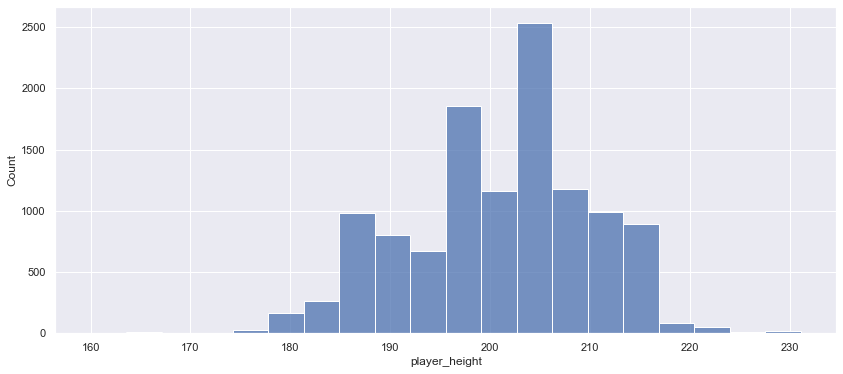

In [49]:
sns.histplot(data=df, x='player_height', bins=20)

**Denisty Plot:** Essentially a histogram with a curve that represents the distribution of data values as a continuous line and the y-axis is plottedas

<AxesSubplot:xlabel='player_height', ylabel='Count'>

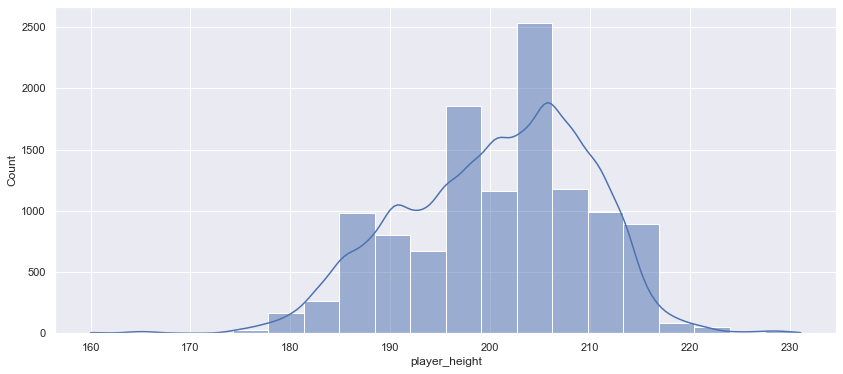

In [50]:
sns.histplot(data=df, x='player_height', bins=20, kde=True)

**Mode:** Value occuring with the highest frequency.

In [52]:
df['player_height'].mode()

0    205.74
dtype: float64

**Expected Value**

In [3]:
# The expected value and variance of 100 fair coin flips
binom.stats(n=100, p=0.5)

(array(50.), array(25.))

In [4]:
# The expected value and variance of 100 biased coin flips with 30% probability of getting heads
# Probability of getting heads = 1 x 0.3, and variance = 0.3 x 0.7 ('p' of failure)
binom.stats(n=100, p=0.3)

(array(30.), array(21.))

**Bar Chart:** Visualises the count of occurences of a categorical value, where the length of the bar is dictated by said count.

<AxesSubplot:xlabel='team_abbreviation', ylabel='counts'>

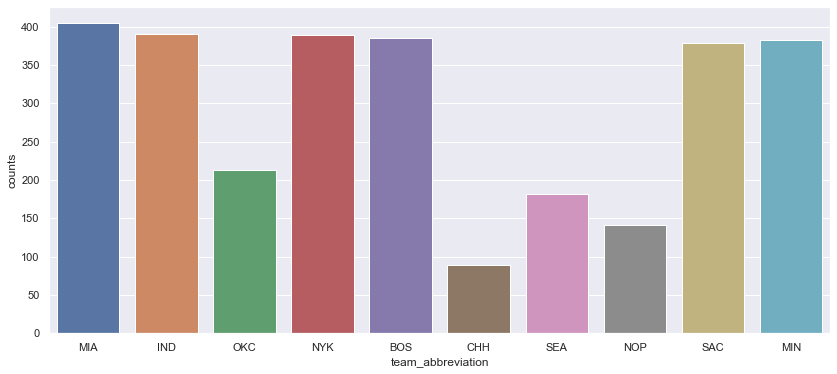

In [61]:
representation = df.groupby(['team_abbreviation']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)
r = representation.sample(10)
sns.barplot(data=r, x='team_abbreviation', y='counts')

### Exploring 2 or more Variables

**Correlation Coefficient:** A metric that determines the extent to which numeric are related, as measured by how a change in one variable changes another variable.

In [62]:
np.corrcoef([df['player_height'], df['player_weight']])[0][1]

0.8273013138578127

**Correlation Table:** Table with calculated correlations of each pair of features.

In [63]:
# A powerful and easy way to generate a correlation table to examine correlation between features
df.corr().iloc[1:,1:]

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
age,1.000000,-0.011678,0.052119,0.049585,0.002873,0.031416,0.086853,0.096820,-0.060633,0.014843,-0.127949,0.022131,0.066615
player_height,-0.011678,1.000000,0.827301,-0.005329,-0.060524,0.422356,-0.457367,-0.008723,0.590928,0.615384,-0.109527,0.069618,-0.625888
player_weight,0.052119,0.827301,1.000000,0.012496,-0.030655,0.437403,-0.387343,0.000612,0.604062,0.607750,-0.071879,0.062474,-0.540902
gp,0.049585,-0.005329,0.012496,1.000000,0.538367,0.468870,0.385596,0.254051,-0.020495,0.060785,0.138849,0.377679,0.134810
pts,0.002873,-0.060524,-0.030655,0.538367,1.000000,0.622818,0.656564,0.221002,-0.124345,0.050246,0.638037,0.378961,0.330269
reb,0.031416,0.422356,0.437403,0.468870,0.622818,1.000000,0.231678,0.193027,0.410619,0.611215,0.225592,0.312843,-0.078836
ast,0.086853,-0.457367,-0.387343,0.385596,0.656564,0.231678,1.000000,0.167207,-0.346569,-0.207846,0.387400,0.177817,0.806682
net_rating,0.096820,-0.008723,0.000612,0.254051,0.221002,0.193027,0.167207,1.000000,0.056778,0.043275,0.000476,0.318076,0.061723
oreb_pct,-0.060633,0.590928,0.604062,-0.020495,-0.124345,0.410619,-0.346569,0.056778,1.000000,0.557682,-0.101293,0.058805,-0.438385
dreb_pct,0.014843,0.615384,0.607750,0.060785,0.050246,0.611215,-0.207846,0.043275,0.557682,1.000000,-0.021448,0.102571,-0.338098


**Scatterplot:** A type of data display that shows the relationship between two numerical variables

<AxesSubplot:xlabel='player_weight', ylabel='player_height'>

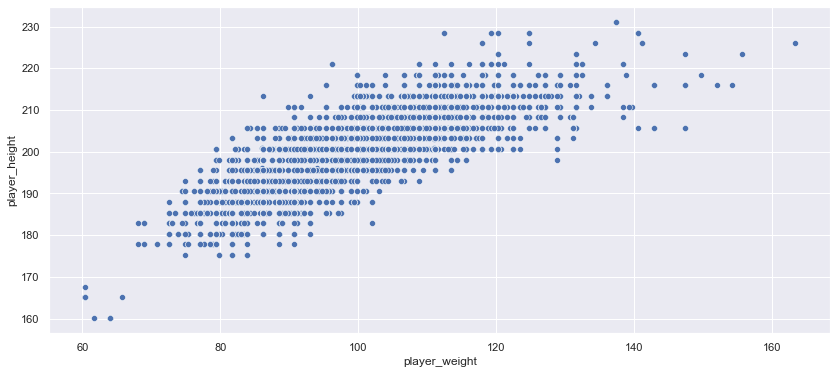

In [64]:
sns.scatterplot(data=df, x='player_weight', y='player_height')

**Hexagonal Binning:** Another way to manage the problem of having to many points that start to overlap. Hexagonal binning plots density, rather than points.

<AxesSubplot:xlabel='player_weight', ylabel='player_height'>

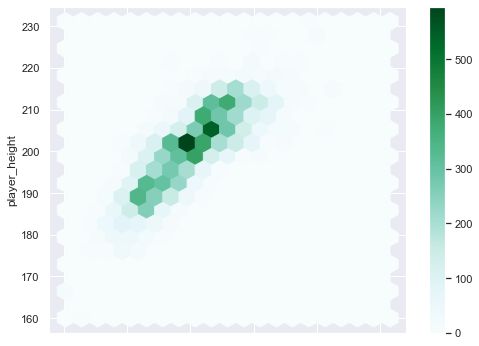

In [66]:
df.plot.hexbin(x='player_weight', y='player_height',gridsize=20, figsize=(8,6))

**Contour Plot:** Topographical map with each contour representing a specific density of points. Contours/lines increase in density to help us determine here our data is most dense.

<AxesSubplot:xlabel='player_weight', ylabel='player_height'>

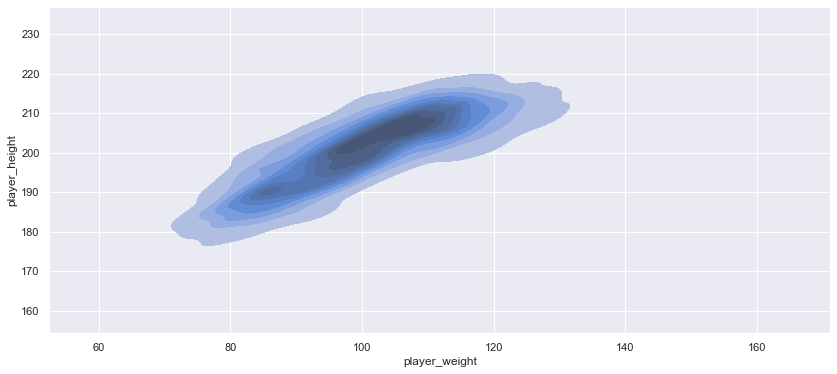

In [68]:
sns.kdeplot(data=df, x='player_weight', y='player_height', shade='fill')

**Contingency Table:** Allow us to summarise two categorical variables by generating a count table. Yes, this is similar to a Pivot Table and I would recommend using Excel for this.

In [69]:
crosstab = df[["college", "team_abbreviation"]].pivot_table(
		index='college', 
		columns='team_abbreviation',
		aggfunc=lambda x: len(x), 
		margins=True
)
crosstab.fillna(0, inplace=False)

team_abbreviation,ATL,BKN,BOS,CHA,CHH,CHI,CLE,DAL,DEN,DET,GSW,HOU,IND,LAC,LAL,MEM,MIA,MIL,MIN,NJN,NOH,NOK,NOP,NYK,OKC,ORL,PHI,PHX,POR,SAC,SAS,SEA,TOR,UTA,VAN,WAS,All
college,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Alabama,0.0,2.0,2.0,8.0,0.0,1.0,10.0,0.0,10.0,5.0,6.0,0.0,5.0,5.0,7.0,4.0,3.0,8.0,4.0,1.0,0.0,0.0,2.0,5.0,0.0,3.0,1.0,2.0,4.0,3.0,7.0,0.0,1.0,3.0,1.0,1.0,114
Alabama A&M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Alabama Huntsville,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wyoming,4.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,3.0,3.0,0.0,0.0,3.0,0.0,1.0,0.0,37
Xavier,0.0,0.0,3.0,3.0,1.0,0.0,4.0,0.0,3.0,0.0,3.0,2.0,9.0,4.0,1.0,2.0,7.0,1.0,0.0,4.0,8.0,3.0,3.0,1.0,1.0,4.0,4.0,1.0,3.0,2.0,1.0,2.0,1.0,0.0,1.0,4.0,86
Yale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,9


**Violin Plot:** Violin plots add a density estimate feature on the y-axis to a boxplot. This helps us see the distribution of values within the boxes and identify where the density of values biases. However, the are less apt at representing outliers vs a box plot.

<AxesSubplot:xlabel='pts', ylabel='team_abbreviation'>

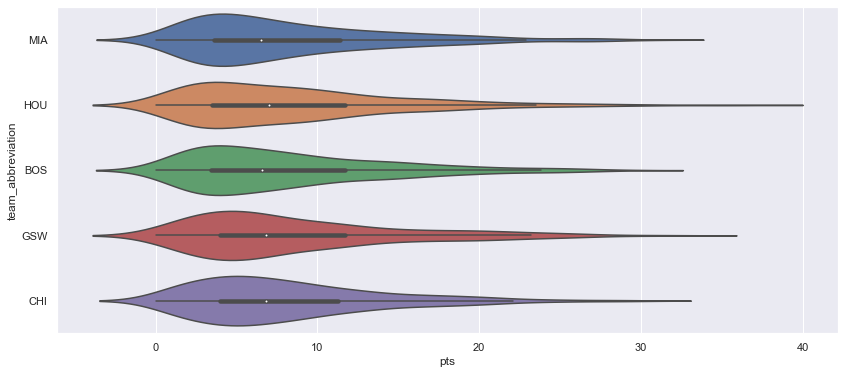

In [70]:
pts_by_team_comparison = ['CHI', 'BOS', 'GSW', 'HOU', 'MIA']
df_pts_comparison = df.loc[df['team_abbreviation'].isin(pts_by_team_comparison)]

sns.violinplot(x=df_pts_comparison['pts'], y=df_pts_comparison['team_abbreviation'])

**Heatmap:** A correlation heatmap is a graphical representation of a correlation matrix representing the correlation between different variables.

<AxesSubplot:>

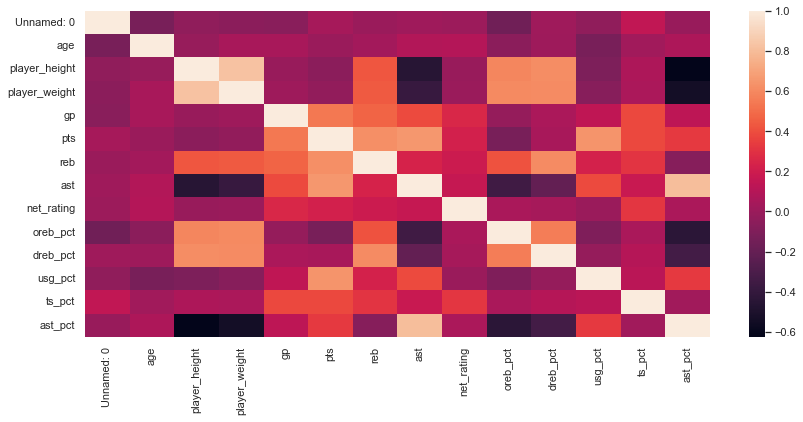

In [71]:
sns.heatmap(df.corr())